In [42]:
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
import math

In [43]:
def fourier_derivative_2nd(f, dx):
    nx = np.size(f)
    kmax = np.pi / dx
    dk = kmax / (nx / 2)
    k = np.arange(float(nx))
    k[: int(nx/2)] = k[: int(nx/2)] * dk 
    k[int(nx/2) :] = k[: int(nx/2)] - kmax
    
    ff = np.fft.fft(f)
    ff = (1j*k)**2 * ff
    df_num = np.real(np.fft.ifft(ff))
    return df_num

In [44]:
def ricker(dt, pt):
    nt = int(2 * pt / dt)
    c = np.zeros(nt)
    t0 = pt / dt
    a_ricker = 4 / pt

    for it in range(0, nt):
        t = ((it + 1) - t0) * dt
        c[it] = -2 * a_ricker * t * math.exp(-(a_ricker * t) ** 2)

    return c

In [45]:
nt    = 3500    
c     = 343.    
eps   = 0.3     
isnap = 50      
isx   = 1250    
f0    = 40.     
nx    = 2024    

p = np.zeros(nx) ; pnew = p ; pold = p ; d2p = p; dp = p   
ap = np.zeros(nx); apnew = ap; apold = ap; ad2p = ap; adp = ap 
sp = np.zeros(nx); spnew = sp; spold = sp; sd2p = sp; sdp = p 

dx = 1250./(nx-1)  
x  = np.arange(0, nx)*dx  
dt = eps*dx/c; 

In [46]:
t   = np.arange(1, nt+1)*dt  
T0  = 1./f0
tmp = ricker(dt, T0)
tmp = np.diff(tmp)
src = np.zeros(nt) 
src[0:np.size(tmp)] = tmp
lam = c*T0

sigma = 2*dx
x0 = x[isx-1]
sg = np.exp(-1/sigma**2 *(x - x0)**2); sg = sg/np.amax(sg)

<IPython.core.display.Javascript object>


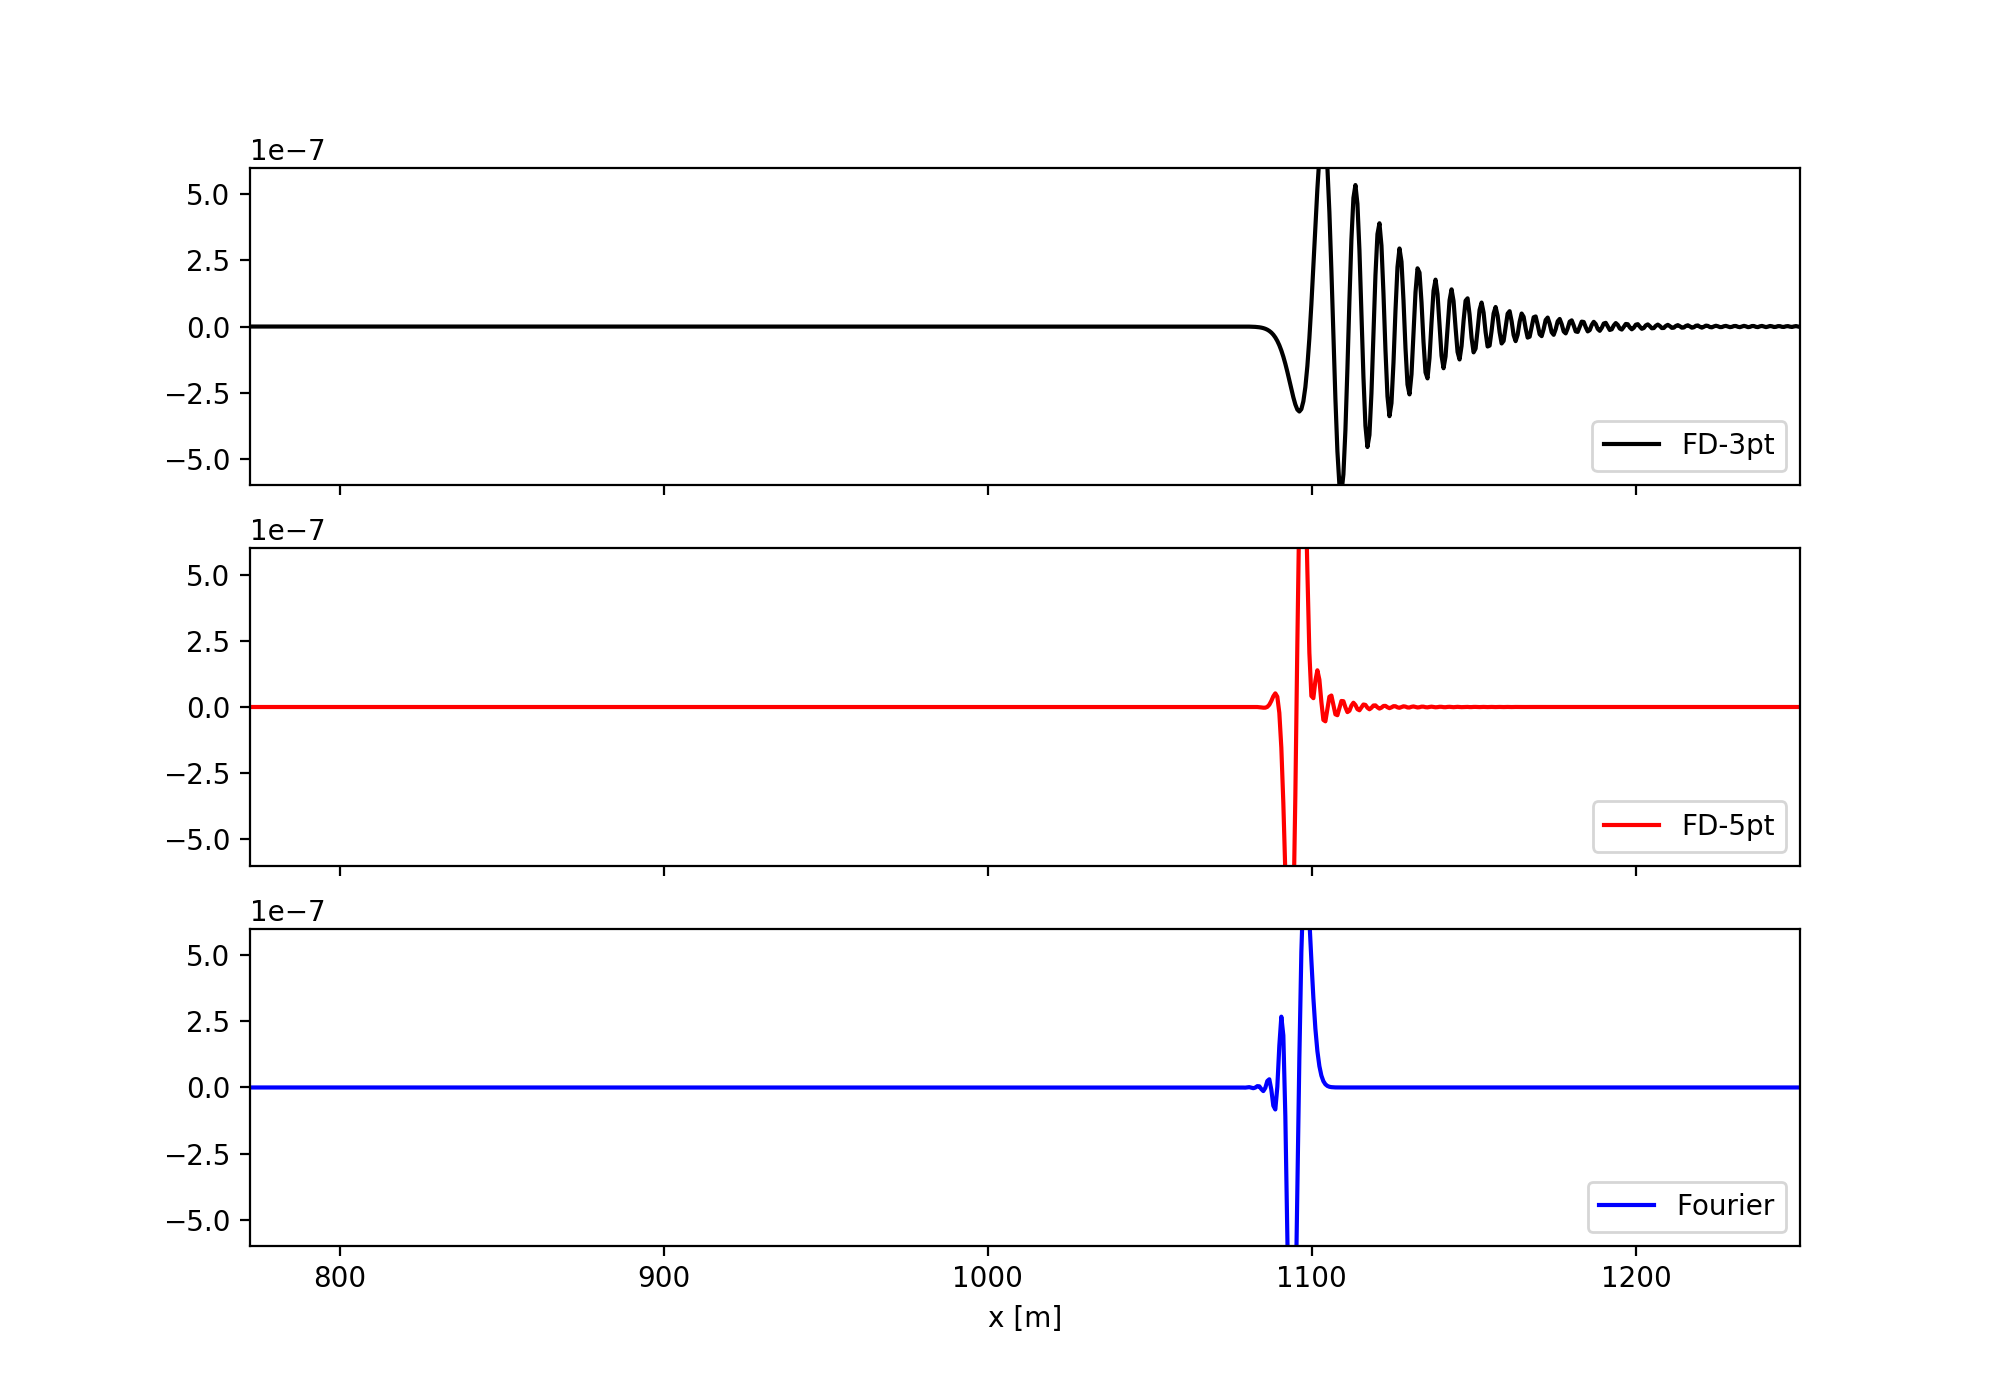

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True, figsize=(10,7))  
line1 = ax1.plot(x[isx:], p[isx:], 'k', lw=1.5, label='FD-3pt')
line2 = ax2.plot(x[isx:], ap[isx:], 'r', lw=1.5, label='FD-5pt')
line3 = ax3.plot(x[isx:], sp[isx:], 'b', lw=1.5, label='Fourier')
ax1.axis([isx*dx, nx*dx, -6E-7, 6E-7]); ax3.set_xlabel('x [m]')
ax1.legend(loc=4)  
ax2.legend(loc=4) 
ax3.legend(loc=4)

plt.ion()  
plt.show()

In [48]:
for it in range(nt):
    sd2p  = fourier_derivative_2nd(sp, dx)         
    spnew = 2*sp - spold + c**2 * dt**2 * sd2p   
    spnew = spnew + sg*src[it]*dt**2             
    spold, sp = sp, spnew                      
    sp[1] = 0; sp[nx-1] = 0  
       
    for i in range(1, nx-1):
        d2p[i] = (p[i+1] - 2*p[i] + p[i-1])/dx**2        
    pnew = 2*p - pold + dt**2 * c**2 * d2p    
    pnew = pnew + sg*src[it]*dt**2 
    pold, p = p, pnew 
    p[0] = 0; p[nx-1] = 0 
        
    for i in range(2, nx-2):
        ad2p[i] = (-1/12*ap[i+2] + 4/3*ap[i+1] - 5/2*ap[i] \
                   + 4/3*ap[i-1] - 1/12*ap[i-2])/dx**2      
    apnew = 2*ap - apold + dt**2 * c**2 * ad2p   
    apnew = apnew + sg*src[it]*dt**2   
    apold, ap = ap, apnew 
    ap[0] = 0; ap[nx-1] = 0 
    
    if not it % isnap: 
        for l in line1:
            l.remove()
            del l               
        for l in line2:
            l.remove()
            del l
        for l in line3:
            l.remove()
            del l
            
        line1 = ax1.plot(x[isx:], p[isx:], 'k', lw=1.5)
        line2 = ax2.plot(x[isx:], ap[isx:], 'r', lw=1.5)
        line3 = ax3.plot(x[isx:], sp[isx:], 'b', lw=1.5)
        plt.gcf().canvas.draw()
plt.show()